In [4]:
import madina as md
import madina.una.tools as una
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', None)

In [5]:
from madina.una.workflows import KNN_accessibility

In [6]:
# read in pairsings_baseline.csv
pairing_table = pd.read_csv('baseline/pairings_baseline.csv')

In [10]:
pairing_table.head()

,Unnamed: 0,Network_File,Network_Cost,Flow_Name,Origin_File,Origin_Name,Origin_Weight,Destination_File,Destination_Name,Destination_Weight,Radius,Beta,KNN_Weight,Plateau,Turns,Turn_Threshold,Turn_Penalty,Detour,Elastic_Weights,Decay,Decay_Mode,Closest_destination
0,0,2024-08-19 sidewalk_network_issue_type_issue_l...,Geometric,home_grocery,homepoints.geojson,homes,Count,grocery.geojson,grocery,Count,2500,0.00328,[3],0,False,0,0,1.0,False,True,exponent,False
1,1,2024-08-19 sidewalk_network_issue_type_issue_l...,Geometric,home_retail,homepoints.geojson,homes,Count,retail.geojson,retail no grocery,Count,2500,0.00328,"[0.5, 0.45, 0.4, 0.35, 0.3]",0,False,0,0,1.0,False,True,exponent,False
2,2,2024-08-19 sidewalk_network_issue_type_issue_l...,Geometric,home_food,homepoints.geojson,homes,Count,food.geojson,eating places,Count,2500,0.00328,"[0.75, 0.45, 0.25, 0.25, 0.225, 0.225, 0.225, ...",0,False,0,0,1.0,False,True,exponent,False
3,3,2024-08-19 sidewalk_network_issue_type_issue_l...,Geometric,home_drink,homepoints.geojson,homes,Count,drink.geojson,drinking places,Count,2500,0.00328,"[0.5, 0.45, 0.4, 0.35, 0.3]",0,False,0,0,1.0,False,True,exponent,False
4,4,2024-08-19 sidewalk_network_issue_type_issue_l...,Geometric,home_personal,homepoints.geojson,homes,Count,personal_service.geojson,personal services,Count,2500,0.00328,"[0.5, 0.45, 0.4, 0.35, 0.3]",0,False,0,0,1.0,False,True,exponent,False


In [48]:
#change Network_Cost values to length
# pairing_table['Network_Cost'] = "Geometric"

In [49]:
#replace all the .feather in the pairing_table with .csv
# pairing_table ['Network_File'] = pairing_table['Network_File'].str.replace('.feather', '.geojson')
# pairing_table ['Origin_File'] = pairing_table['Origin_File'].str.replace('.feather', '.geojson')
# pairing_table ['Destination_File'] = pairing_table['Destination_File'].str.replace('.feather', '.geojson')

In [8]:
#change Beta value to 0.00328
pairing_table['Beta'] = 0.00328

In [9]:
#save the pairing_table to a csv file
pairing_table.to_csv('baseline/pairings_baseline.csv', index=False)

In [11]:
KNN_accessibility(
     city_name='seattle',
     data_folder='baseline',
     pairings_file="pairings_baseline.csv",
     num_cores=10,
 )

total time | seconds elapsed |                flow_name                 | event
    0.0000 |        0.000000 |                   ---                    | SIMULATION STARTED: VERSION: 0.0.15, RELEASE DATEL 2023-02-16
    0.0119 |        0.011922 |                   ---                    | 3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:43:44) [Clang 13.0.1 ]
    0.0132 |        0.001322 |                   ---                    | Dependencies: Geopandas:1.0.1, Shapely:2.0.5, Pandas:2.2.2, Numpy:1.25.2, NetworkX:2.8.7
    2.7864 |        2.773206 |           (1/13) home_grocery            | network FIle Loaded, Projection: EPSG:2285
    6.4472 |        3.660764 |           (1/13) home_grocery            | network topology created
    6.7521 |        0.304850 |           (1/13) home_grocery            | homes file homepoints.geojson Loaded, Projection: EPSG:2285
    6.7575 |        0.005412 |           (1/13) home_grocery            | grocery  file grocery.geojson Loaded, Proj

In [12]:
# read the output
baseline = gpd.read_file("Cities/seattle/KNN_workflow/2024-10-27 20-50/origin_record.geoJSON")

In [14]:
baseline ['total_knn_access'].describe()

count    49042.000000
mean         2.233044
std          2.142035
min          0.007886
25%          0.781021
50%          1.433373
75%          2.895073
max         18.268964
Name: total_knn_access, dtype: float64

In [15]:
#plot this as cdf
import numpy as np
#function to sort and calculate the cumulative data
def get_cumulative_data(df, column):
    #sort the data by the column
    df = df.sort_values(by=column,ascending=True)
    sorted_data = df[column].values
    #calculate the cumulative data
    cumulative_data = np.cumsum(sorted_data) / np.sum(sorted_data)
    return sorted_data, cumulative_data

In [16]:
u_geometric_sorted, u_geometric_cumulative = get_cumulative_data(baseline, 'total_knn_access')

In [17]:
import matplotlib.pyplot as plt

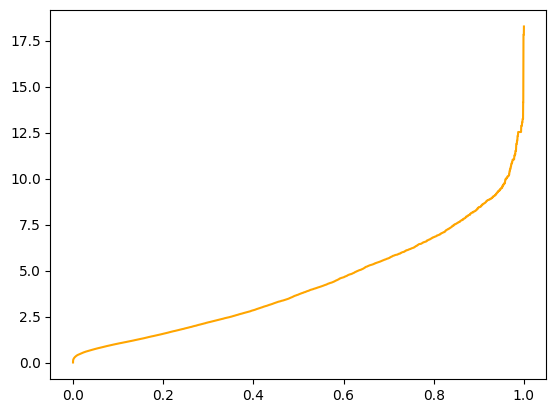

In [18]:
plt.plot(u_geometric_cumulative, u_geometric_sorted, label='Geometric', color='orange')